In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

# Reading the data

In [2]:
train_df = pd.read_csv("C:/Users/Jayanth/Desktop/train.csv/train.csv")
test_df = pd.read_csv("C:/Users/Jayanth/Desktop/test.csv/test.csv")

# Business understanding

# Data Understanding

In [3]:
train_df.shape

(137, 43)

In [4]:
train_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [5]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

None

# EDA(Data preprocessing)

In [6]:
num_col = train_df.select_dtypes(exclude=['object']).columns
cat_col = train_df.select_dtypes(include=['object']).columns

In [7]:
print(num_col)

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')


In [8]:
print(cat_col)

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')


In [9]:
train_df.shape

(137, 43)

In [10]:
test_df.shape

(100000, 42)

In [11]:
train_df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [12]:
train_df['Open Date'] = pd.to_datetime(train_df['Open Date'],format='%m/%d/%Y')
dateLastTrain = pd.DataFrame({'Date':np.repeat(['10/01/2018'],[len(train_df)])})
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'],format='%m/%d/%Y')
train_df['Open Days'] = dateLastTrain['Date'] - train_df['Open Date']
train_df['Open Days'] = train_df['Open Days'].astype('timedelta64[D]').astype('int')

In [13]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,7016
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3882
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,2032
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2433
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3432


# Comparing revenue of big cities and other

In [14]:
cityPerc = train_df[['City Group','revenue']].groupby(['City Group'],as_index =False).mean()

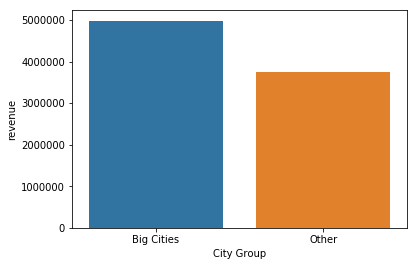

In [15]:
sns.barplot(x='City Group',y='revenue',data=cityPerc)

In [16]:
cityPercCity = train_df[['City','revenue']].groupby(['City'],as_index =False).mean()
sortDf = cityPercCity.sort_values(['revenue'],ascending=False)

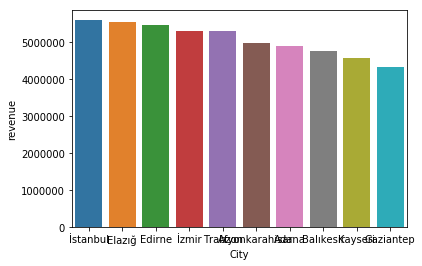

In [17]:
sns.barplot(x='City',y='revenue',data=sortDf.head(10))

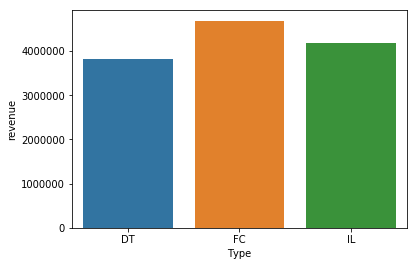

In [18]:
cityPercType = train_df[['Type','revenue']].groupby(['Type'],as_index =False).mean()
sns.barplot(x='Type',y='revenue',data=cityPercType.head(10))

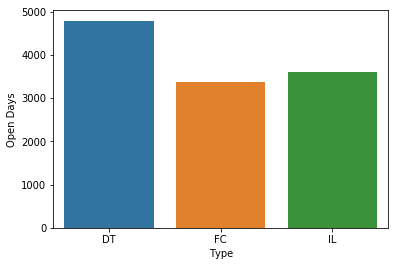

In [19]:
cityPercOpenDays = train_df[['Type','Open Days']].groupby(['Type'],as_index =False).mean()
sns.barplot(x='Type',y='Open Days',data=cityPercOpenDays)

In [20]:
correlation = train_df[num_col].corr()

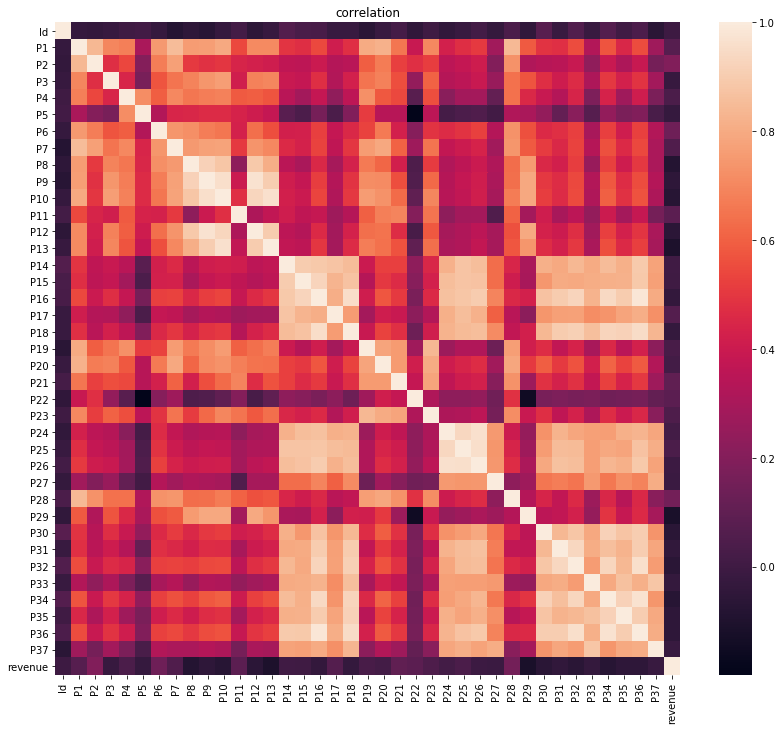

In [21]:
f,ax = plt.subplots(figsize =(14,12))
plt.title('correlation')
sns.heatmap(correlation)
plt.show()

In [22]:
correlation['revenue'].sort_values(ascending = False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

In [23]:
train_df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue', 'Open Days'],
      dtype='object')

In [24]:
drop_values = ['Id', 'Open Date']
train_df = train_df.drop(drop_values,axis=1)

In [25]:
train_df.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,7016
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,3882
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,2032
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,2433
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,3432


In [26]:
cityGrpDummyTrain = pd.get_dummies(train_df['City Group'])
train_df = train_df.join(cityGrpDummyTrain)
train_df = train_df.drop(['City Group'],axis=1)
train_df.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,Open Days,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753.0,7016,1,0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131.0,3882,1,0
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379.0,2032,0,1
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511.0,2433,0,1
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715.0,3432,0,1


In [27]:
train_df.Type.value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,Open Days,Big Cities,Other
0,31,2,3,5,3,1,1,1,4,3,...,4,4,4,4,2,4,111,126,1,0
1,3,1,3,5,3,1,0,1,4,4,...,0,0,0,0,0,0,121,98,1,0
2,10,2,1,3,1,3,1,2,4,4,...,0,0,0,0,0,0,13,12,0,1
3,28,2,5,4,6,4,3,3,5,6,...,6,5,6,6,5,6,27,30,0,1
4,14,2,2,3,2,1,1,1,4,4,...,3,1,2,4,2,3,84,82,0,1


In [29]:
X_train = train_df.drop(['revenue'],axis=1)
X_train.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,Open Days,Big Cities,Other
0,31,2,3,5,3,1,1,1,4,3,...,3,4,4,4,4,2,4,126,1,0
1,3,1,3,5,3,1,0,1,4,4,...,0,0,0,0,0,0,0,98,1,0
2,10,2,1,3,1,3,1,2,4,4,...,0,0,0,0,0,0,0,12,0,1
3,28,2,5,4,6,4,3,3,5,6,...,8,6,5,6,6,5,6,30,0,1
4,14,2,2,3,2,1,1,1,4,4,...,1,3,1,2,4,2,3,82,0,1


In [30]:
Y_train = train_df['revenue']
Y_train.head()

0    111
1    121
2     13
3     27
4     84
Name: revenue, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss = StandardScaler()
df_scaled_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
df_scaled_train.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,Open Days,Big Cities,Other
0,0.880758,1.117025,0.208266,0.614194,-0.435383,-0.489135,0.006422,-0.683287,0.177961,-0.687998,...,0.519634,0.937450,2.520617,1.511250,1.086582,0.453198,1.644301,1.534403,0.869718,-0.869718
1,-1.496856,-0.844929,0.208266,0.614194,-0.435383,-0.489135,-0.873375,-0.683287,0.177961,0.066048,...,-0.634796,-0.657962,-0.611578,-0.623196,-0.706933,-0.645707,-0.631146,0.810600,0.869718,-0.869718
2,-0.902452,1.117025,-0.848492,-0.478593,-1.890197,0.951973,0.006422,-0.129380,0.177961,0.066048,...,-0.634796,-0.657962,-0.611578,-0.623196,-0.706933,-0.645707,-0.631146,-1.412511,-1.149797,1.149797
3,0.626014,1.117025,1.265024,0.067801,1.746840,1.672526,1.766016,0.424528,0.990649,1.574140,...,2.443685,1.735155,3.303666,2.578473,1.983339,2.101555,2.782024,-0.947209,-1.149797,1.149797
4,-0.562793,1.117025,-0.320113,-0.478593,-1.162790,-0.489135,0.006422,-0.683287,0.177961,0.066048,...,-0.249986,0.538597,0.171471,0.444027,1.086582,0.453198,1.075439,0.396998,-1.149797,1.149797


# Data preprocessing for test data

In [33]:
test_df['Open Date'] = pd.to_datetime(test_df['Open Date'],format='%m/%d/%Y')
dateLastTest = pd.DataFrame({'Date':np.repeat(['10/01/2018'],[len(test_df)])})
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'],format='%m/%d/%Y')
test_df['Open Days'] = dateLastTest['Date'] - test_df['Open Date']
test_df['Open Days'] = test_df['Open Days'].astype('timedelta64[D]').astype('int')

In [34]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,Open Days
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,2809
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2754
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1797
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,1974
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,1888


In [35]:
drop_values = ['Id', 'Open Date']
test_df = test_df.drop(drop_values,axis=1)

In [36]:
cityGrpDummyTest = pd.get_dummies(test_df['City Group'])
test_df = test_df.join(cityGrpDummyTest)
test_df = test_df.drop(['City Group'],axis=1)
test_df.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,Open Days,Big Cities,Other
0,Niğde,FC,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,2809,0,1
1,Konya,IL,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,0,0,2754,0,1
2,Ankara,FC,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,1797,1,0
3,Kocaeli,IL,2,4.0,4.0,4.0,2,3,5,4,...,4,0,0,0,0,0,0,1974,0,1
4,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,1888,0,1


In [37]:
from sklearn.preprocessing import LabelEncoder
test_df = test_df.apply(LabelEncoder().fit_transform)
test_df.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,Open Days,Big Cities,Other
0,38,1,0,4,3,2,0,1,4,3,...,0,0,0,0,0,0,0,117,0,1
1,27,2,2,4,3,2,1,1,4,2,...,0,0,0,0,0,0,0,112,0,1
2,3,1,2,4,3,2,1,1,4,3,...,0,0,0,0,0,0,0,6,1,0
3,26,2,1,4,3,2,1,2,4,3,...,4,0,0,0,0,0,0,28,0,1
4,1,1,1,4,3,2,0,1,4,3,...,0,0,0,0,0,0,0,18,0,1


In [38]:
sTest = StandardScaler()
df_scaled_test = pd.DataFrame(sTest.fit_transform(test_df),columns = test_df.columns)
df_scaled_test.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,Open Days,Big Cities,Other
0,0.209832,-0.722556,-1.494698,-0.510617,-0.372697,-0.494415,-0.928924,-0.606512,0.081785,-0.587114,...,-0.573096,-0.646562,-0.643361,-0.628472,-0.670655,-0.65216,-0.589805,-0.396773,-0.985544,0.985544
1,-0.312026,1.140518,-0.391734,-0.510617,-0.372697,-0.494415,0.009772,-0.606512,0.081785,-1.373054,...,-0.573096,-0.646562,-0.643361,-0.628472,-0.670655,-0.65216,-0.589805,-0.452255,-0.985544,0.985544
2,-1.450623,-0.722556,-0.391734,-0.510617,-0.372697,-0.494415,0.009772,-0.606512,0.081785,-0.587114,...,-0.573096,-0.646562,-0.643361,-0.628472,-0.670655,-0.65216,-0.589805,-1.628471,1.014668,-1.014668
3,-0.359467,1.140518,-0.943216,-0.510617,-0.372697,-0.494415,0.009772,0.108942,0.081785,-0.587114,...,1.501177,-0.646562,-0.643361,-0.628472,-0.670655,-0.65216,-0.589805,-1.384351,-0.985544,0.985544
4,-1.545506,-0.722556,-0.943216,-0.510617,-0.372697,-0.494415,-0.928924,-0.606512,0.081785,-0.587114,...,-0.573096,-0.646562,-0.643361,-0.628472,-0.670655,-0.65216,-0.589805,-1.495314,-0.985544,0.985544


# Model Building

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, Y_train, test_size=0.30, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
regModel_train = LinearRegression()
regModel_train.fit(Xtrain,ytrain)
predReg_train = regModel_train.predict(Xtest)
mean_squared_error(ytest,predReg_train)

2399.599922709105

In [42]:
regModel = LinearRegression()

In [43]:
regModel.fit(X_train,Y_train)

LinearRegression()

In [44]:
linearPredictiom = regModel.predict(df_scaled_test)

In [45]:
regModel.score(X_train,Y_train)

0.47803856455697846

In [46]:
randomForestModel_train = RandomForestRegressor(n_estimators=100)
randomForestModel_train.fit(Xtrain,ytrain)
predforest_train = randomForestModel_train.predict(Xtest)
mean_squared_error(ytest,predforest_train)

1189.1276976190475

In [47]:
randomForestModel = RandomForestRegressor(n_estimators=100)

In [48]:
randomForestModel.fit(X_train,Y_train)

RandomForestRegressor()

In [49]:
forestModelPrediction = randomForestModel.predict(df_scaled_test)

In [50]:
randomForestModel.score(X_train,Y_train)

0.8849725138611458

In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE

In [52]:
xgbModel_train = XGBRegressor()
xgbModel_train.fit(Xtrain,ytrain)
predxg_train = xgbModel_train.predict(Xtest)
mean_squared_error(ytest,predxg_train)

1300.1381962656426

In [53]:
xgbModel = XGBRegressor()

In [54]:
xgbModel.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
xgbModel.score(X_train,Y_train)

0.999999962071367

In [56]:
xgbModel.predict(df_scaled_test)

array([25.724155, 13.136243, 16.719913, ..., 36.353462, 30.842598,
       14.666368], dtype=float32)